# Preparing the data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/Users/miant/Desktop/LYIT_Data/OnlineNewsPopularity.csv')
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#Checking missing data
dataset.isnull().values.any()

False

In [4]:
dataset.shape

(39644, 61)

# RANDOM FOREST REGRESSION

In [5]:
#Define X and y
# X: 2 = n_tokens_title,3 = n_tokens_content,6=n_non_stop_unique_tokens,7=num_hrefs,8=num_self_hrefs,
#9= num_imgs,10= num_videos,12=num_keywords,38 = is_weekend,44 =global_subjectivity,46= global_rate_positive_words,  
#48= rate_positive_words, 56 = title_subjectivity

#y:

X = dataset.iloc[:,[2, 3, 6, 7, 8, 9, 10, 12, 38, 44, 46, 48, 56]].values
y = dataset.iloc[:, -1].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.66046517  0.20310677  0.21737485 ...  0.66120764  0.27129988
  -0.66583771]
 [ 0.28693992  3.27275386 -0.7364249  ...  0.91595022 -0.14503681
  -0.56306836]
 [-0.18676263 -0.01780683 -0.14172357 ... -1.10327543  0.27129988
   1.90339607]
 ...
 [ 0.28693992 -1.15393392 -4.31854226 ... -2.27054884 -3.55938674
   1.90339607]
 [ 0.76064247  0.16102799  0.28531226 ...  0.5716558   0.48895252
  -0.25476031]
 [-0.18676263 -0.7541855   0.72359669 ...  0.44378072  1.66427683
   0.82431788]]
[[-1.13416772  0.55025672 -0.30820492 ... -1.13864735 -0.57443613
  -0.87137641]
 [ 0.76064247 -0.89725335  0.7162089  ... -0.86147065 -1.6005129
   0.46462515]
 [ 0.76064247  0.72067578 -1.20996549 ... -0.08392096  0.99457637
   2.21170413]
 ...
 [-1.13416772  0.39666917 -0.73457172 ...  0.13973325 -0.32071533
  -0.87137641]
 [-0.66046517  0.11053346 -1.22568596 ... -1.22175077 -0.17936914
  -0.87137641]
 [-1.13416772 -0.15666681  0.50812069 ... -0.21539542 -0.94755496
  -0.87137641]]


In [8]:
#RANDOM FOREST REGRESSION
# Training the Random Forest Regression model 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1441.    919. ]
 [ 2991.3  1600. ]
 [ 5154.1 11700. ]
 ...
 [ 8607.  12700. ]
 [ 1883.3   651. ]
 [ 1478.   2200. ]]


In [10]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.6935636006730714

In [11]:
#PREDICTION: How many shares would it have an article that has 20 words in the title, 700 words in the content, 70% non stop rating,
#2 links, 1 link to another Mashable article, 2 images, 1 video, 20 keywords,1 means weekend, 50% rate of subjetivity in the text, 
# 8% of positive content rate, 8% rate positive words,60% title subjetivity

print('It would have ', regressor.predict([[20,500, 0.70,2,1,2,1,20,1,0.50,0.08,0.08,0.60]]), 'shares')


It would have  [12390.] shares


# Decision Tree Regressor


In [12]:
# Decision Tree Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


X2 = dataset.iloc[:,[2, 3, 9, 10, 13, 14, 15, 16, 17, 18, 31, 32, 33, 34, 35, 36, 37]]
y2 = dataset.iloc[:, -1].values



In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [14]:
# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [15]:
# Predicting the Test set results
y2_pred = regressor2.predict(X2_test)
np.set_printoptions(precision=2)
print(np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[ 1800.   919.]
 [ 5000.  1600.]
 [ 3000. 11700.]
 ...
 [ 2900. 12700.]
 [ 5600.   651.]
 [13800.  2200.]]


In [16]:
#We calculate the precision of the model or r^2
print('The precision of the model is ')
print(regressor2.score(X2_train, y2_train))

The precision of the model is 
0.9721008783783794


In [17]:
print(regressor2.predict([[20, 500, 1, 5, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]))

[744.]


# CLUSTERING

In [18]:
#X1 = dataset.iloc[:, [2,3, 7, 8]].values 'n_tokens_title'

X1 = dataset.iloc[:, [2,3, 7, 8]].values

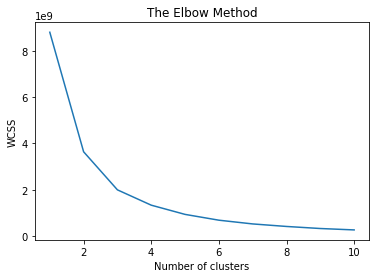

In [19]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
#Importing and Fitting K-Means to dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y1 = kmeans.fit_predict(X1)

In [21]:
y1

array([0, 0, 0, ..., 0, 2, 0])

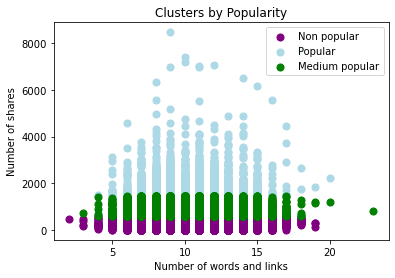

In [22]:
# Plotting results to show the clusters

plt.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], s = 50, c = 'purple', label = 'Non popular')
plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], s = 50, c = 'lightblue', label = 'Popular')
plt.scatter(X1[y1 == 2, 0], X1[y1 == 2, 1], s = 50, c = 'green', label = 'Medium popular')
plt.title('Clusters by Popularity')
plt.xlabel( 'Number of words and links')
plt.ylabel('Number of shares')
plt.legend()
plt.show()

In [23]:
#Green is non popular, purple is medium popular, light blue is popular

# Classification model: K-NN

In [24]:
#Adding the cluster column to the dataset
dataset['Popularity']= y1
dataset.head
print(dataset['Popularity'])

0        0
1        0
2        0
3        0
4        2
        ..
39639    0
39640    0
39641    0
39642    2
39643    0
Name: Popularity, Length: 39644, dtype: int32


In [25]:
dataset.shape

(39644, 62)

In [26]:
#Defining X and y
X3 = dataset.iloc[:,[2, 3, 7, 8, 61]].values
y3 = dataset.iloc[:, -1].values

In [27]:
y3

array([0, 0, 0, ..., 0, 2, 0])

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state = 0)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

In [30]:
# Training the K-NN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X3_train, y3_train)

KNeighborsClassifier()

In [31]:
# Predicting the Test set results
y3_pred = classifier.predict(X3_test)
print(np.concatenate((y3_pred.reshape(len(y3_pred),1), y3_test.reshape(len(y3_test),1)),1))

[[2 2]
 [0 0]
 [2 2]
 ...
 [2 2]
 [2 2]
 [2 2]]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y3_test, y3_pred)
print(cm)
accuracy_score(y3_test, y3_pred)

[[6747    0    2]
 [   0  426    4]
 [   0    1 2731]]


0.9992937140550903

In [33]:
#MAKING PREDICTION: What category would be in a publication that has 20 letters in the title and 1000 words in the content

print('It would belong to segment ', classifier.predict([[20,1000,5,10, 744]]))

It would belong to segment  [1]


# Reinforcement learning model: Thompson Sampling

In [34]:
#Importing dataset

new = pd.read_csv('C:/Users/miant/Desktop/Python/Mashable_news.csv')

In [35]:
new.head()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [36]:
new.shape

(39644, 7)

In [37]:
import random

N = 39644 #number of users who were exposed to the article
d = 7 #number of days that we post the article

In [38]:
arts_selected = [] 
numbers_of_rewards_1 = [0] * d 
numbers_of_rewards_0 = [0] * d 
total_reward = 0 

for n in range(0, N): 
    art = 0 
    max_random = 0 
        
#We start the second for loop

    for i in range(0, d): #here we go from 0 till the nimber of ads
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) 
        if random_beta > max_random: 
            max_random = random_beta 
            art = i 
    
    arts_selected.append(art) #
    reward = new.values[n, art] 
    
    if reward == 1: 
        numbers_of_rewards_1[art] = numbers_of_rewards_1[art] + 1 #the reward is 1
    else:
        numbers_of_rewards_0[art] = numbers_of_rewards_0[art] + 1 #the reward is 0
        
    total_reward = total_reward + reward #0 where we started + the accumulated rewards

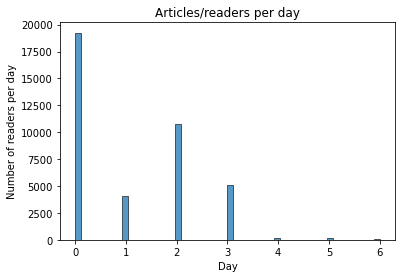

In [40]:
#Visualisation 
import seaborn as sns

ax = sns.histplot(arts_selected)
plt.title('Articles/readers per day')
plt.xlabel('Day')
plt.ylabel('Number of readers per day')
plt.show()

In [ ]:
dataset['Popularity'].value_counts()

In [ ]:
totals = [26752, 11129, 1763]

popular = ['Popular','Medium Popular', 'Non Popular']
    #1 = medium popular, 2=popular, 3 = non popular

In [ ]:
import statistics as stats
dataset.describe()